# VEHICLE ROUTING PROBLEM

In [1]:
!pip install matplotlib deap


  Using cached deap-1.4.1-cp312-cp312-macosx_10_9_universal2.whl


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [3]:
customers = [(1, 2), (3, 5), (0, 7), (8, 1), (6, 9)]
demands = [10, 15, 8, 22, 13]
vehicle_capacity = 50

In [4]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()


In [5]:
def create_route():
    route = list(range(len(customers)))
    random.shuffle(route)
    return route

def create_individual():
    return [create_route()]

toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


In [6]:
def crossover_routes(ind1, ind2):
    """Order crossover for VRP."""
    size1 = len(ind1[0])
    size2 = len(ind2[0])
    if size1 < 2 or size2 < 2:
        return ind1, ind2
    cxpoint1, cxpoint2 = sorted(random.sample(range(min(size1, size2)), 2))
    temp1 = ind1[0][cxpoint1:cxpoint2+1] + [c for c in ind2[0] if c not in ind1[0][cxpoint1:cxpoint2+1]]
    temp2 = ind2[0][cxpoint1:cxpoint2+1] + [c for c in ind1[0] if c not in ind2[0][cxpoint1:cxpoint2+1]]
    ind1[0][:], ind2[0][:] = temp1, temp2
    return ind1, ind2


def mutate_route(individual, indpb=0.05):
    """Swap mutation for VRP."""
    for route in individual:
        if len(route) > 1:
            for i in range(len(route)):
                if random.random() < indpb:
                    j = random.randint(0, len(route) - 1)
                    route[i], route[j] = route[j], route[i]
    return individual,





In [7]:
def evaluate(individual):
    total_distance = 0
    for route in individual:
        # Calculate distance traveled on this route
        route_distance = 0
        prev_customer = None
        for customer_idx in route:
            if prev_customer is not None:
                x1, y1 = customers[prev_customer]
                x2, y2 = customers[customer_idx]
                distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                route_distance += distance
            prev_customer = customer_idx
        total_distance += route_distance

        # Check capacity constraint
        route_demand = sum(demands[i] for i in route)
        if route_demand > vehicle_capacity:
            # Penalize solutions that violate capacity
            total_distance += 1000  # Example penalty

    return (total_distance,)

In [8]:
toolbox.register("evaluate", evaluate)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", crossover_routes)
toolbox.register("mutate", mutate_route)

In [9]:
# Run the genetic algorithm
def run_ga(generations=200, pop_size=100):
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)  # Store the best individual

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=generations, stats=stats, halloffame=hof, verbose=True)

    return pop, logbook, hof

gen	nevals	avg    	min    
0  	100   	1025.86	1020.61
1  	80    	1024.29	1020.61
2  	88    	1024.27	1020.61
3  	83    	1023.51	1020.61
4  	83    	1023.31	1020.61
5  	88    	1023.87	1020.61
6  	91    	1023.71	1020.61
7  	79    	1023.04	1020.61
8  	79    	1023.37	1020.61
9  	90    	1023.3 	1020.61
10 	80    	1023.67	1020.61
11 	85    	1023.37	1020.61
12 	90    	1023.48	1020.61
13 	84    	1023.28	1020.61
14 	79    	1023.26	1020.61
15 	89    	1022.99	1020.61
16 	73    	1022.38	1020.61
17 	92    	1023.31	1020.61
18 	90    	1023.32	1020.61
19 	80    	1023.14	1020.61
20 	83    	1023.95	1020.61
21 	80    	1023.19	1020.61
22 	80    	1023.33	1020.61
23 	78    	1023.23	1020.61
24 	88    	1023.51	1020.61
25 	96    	1023.42	1020.61
26 	89    	1024   	1020.61
27 	81    	1023.37	1020.61
28 	87    	1023.75	1020.61
29 	85    	1023.22	1020.61
30 	80    	1023.21	1020.61
31 	76    	1023.25	1020.61
32 	76    	1022.56	1020.61
33 	89    	1023.17	1020.61
34 	77    	1022.67	1020.61
35 	77    	1022.51	1020.61
3

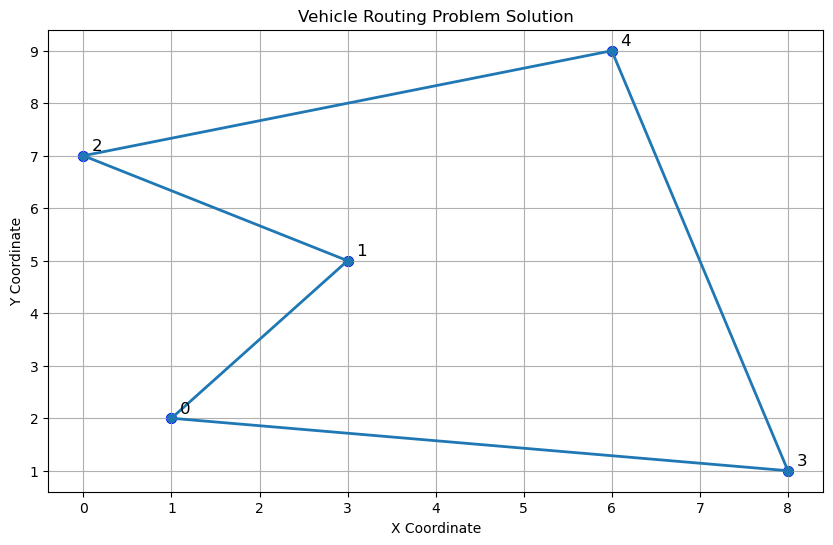

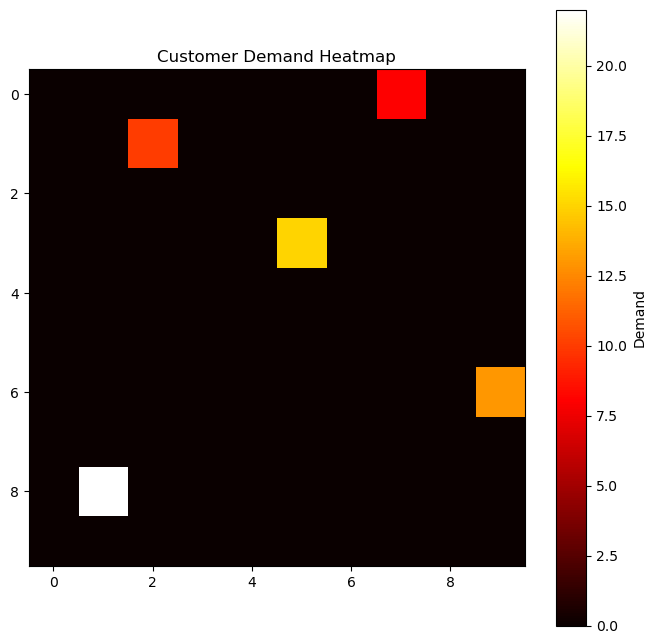

In [10]:
def plot_vrp_solution(individual):
    """Plots the VRP solution."""
    plt.figure(figsize=(10, 6))

    # Plot customer locations
    for i, (x, y) in enumerate(customers):
        plt.scatter(x, y, marker='o', color='blue', s=50)
        plt.text(x + 0.1, y + 0.1, str(i), fontsize=12)

    # Plot routes
    for route in individual:
        if len(route) > 0:
            route_coords = [customers[i] for i in route]
            route_coords.append(route_coords[0])  # Close the loop
            xs, ys = zip(*route_coords)
            plt.plot(xs, ys, marker='o', linestyle='-', linewidth=2)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Vehicle Routing Problem Solution')
    plt.grid(True)
    plt.show()

# Create a 2D matrix to visualize the VRP solution
def plot_vrp_matrix(individual):
    matrix_size = max(max(x, y) for x, y in customers) + 1
    matrix = np.zeros((matrix_size, matrix_size))

    # Populate the matrix with demands
    for (x, y), demand in zip(customers, demands):
        matrix[x, y] = demand

    plt.figure(figsize=(8, 8))
    plt.imshow(matrix, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Demand')
    plt.title('Customer Demand Heatmap')
    plt.show()

# Call the plotting functions after running the genetic algorithm
pop, logbook, hof = run_ga()
best_individual = hof[0]
plot_vrp_solution(best_individual)
plot_vrp_matrix(best_individual)